# Lecture6; Optimization

### Library

In [7]:
import tensorflow as tf
from tensorflow.keras import Model, layers, initializers
import numpy as np
from matplotlib import pyplot as plt
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

### Data processing

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)

num_classes = 10
num_features = 784

x_train, x_test = tf.reshape(x_train,[-1, num_features]), tf.reshape(x_test, [-1, num_features])
x_train, x_test = x_train / 255., x_test / 255.

batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

### Define functions for Training/Testing

In [13]:
def cross_entropy_loss(x, y):
    y = tf.cast(y, tf.int64)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()

def Train_model(model, optimizer, epo, print_loss=True, plot_graph=True):
    step_l = []
    loss_l = []
    
    for epoch in range(1,epo+1):
        for step, (batch_x, batch_y) in enumerate(train_data, 1):
            with tf.GradientTape() as g:
                pred = model(batch_x)
                loss = cross_entropy_loss(pred, batch_y)

            trainable_variables = model.trainable_variables
            gradients = g.gradient(loss, trainable_variables)
            optimizer.apply_gradients(zip(gradients, trainable_variables))
             
            if plot_graph:
                if step % 50 == 0:
                    step_l.append((epoch-1)*300 + step)
                    loss_l.append(loss.numpy())
        if print_loss and epoch % 2 == 1:
            acc = accuracy(model(x_test), y_test)
            print("epoch: ", epoch, ", loss: ", loss.numpy(), "acc: ", acc)
    
    if plot_graph:
        plt.plot(step_l, loss_l)
    return model

## Compare activation function

In [20]:
# Create TF Model.
class ReLU_NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(ReLU_NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        self.fc3 = layers.Dense(256, activation=tf.nn.relu)
        self.fc4 = layers.Dense(256, activation=tf.nn.relu)
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

class Sigmoid_NeuralNet(Model):
    def __init__(self):
        super(Sigmoid_NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, activation=tf.nn.sigmoid)
        self.fc2 = layers.Dense(256, activation=tf.nn.sigmoid)
        self.fc3 = layers.Dense(256, activation=tf.nn.sigmoid)
        self.fc4 = layers.Dense(256, activation=tf.nn.sigmoid)
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

Train ReLU Model
epoch:  1 , loss:  2.30245 acc:  0.1438
epoch:  3 , loss:  2.2978988 acc:  0.2733
epoch:  5 , loss:  2.2901516 acc:  0.3616
epoch:  7 , loss:  2.271091 acc:  0.3186
epoch:  9 , loss:  2.2074115 acc:  0.3103
epoch:  11 , loss:  2.091316 acc:  0.4094
epoch:  13 , loss:  2.0709176 acc:  0.4908
epoch:  15 , loss:  1.9723021 acc:  0.5283
epoch:  17 , loss:  1.86114 acc:  0.6903
epoch:  19 , loss:  1.7982906 acc:  0.7214
epoch:  21 , loss:  1.7635455 acc:  0.7351
epoch:  23 , loss:  1.7464213 acc:  0.7431
epoch:  25 , loss:  1.7222258 acc:  0.7479
epoch:  27 , loss:  1.7558446 acc:  0.7525
epoch:  29 , loss:  1.6830331 acc:  0.755
epoch:  31 , loss:  1.6615111 acc:  0.7572
epoch:  33 , loss:  1.7098336 acc:  0.7589
epoch:  35 , loss:  1.6981348 acc:  0.7598
epoch:  37 , loss:  1.7092 acc:  0.7612
epoch:  39 , loss:  1.6911039 acc:  0.7632


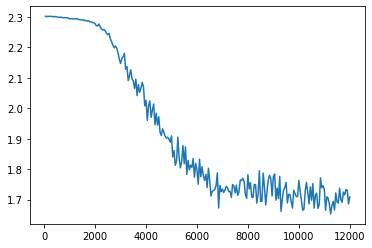

In [15]:
relu_nn = ReLU_NeuralNet()

optimizer = tf.optimizers.SGD(0.005)
print("Train ReLU Model")
relu_nn = Train_model(relu_nn, optimizer, 40)

In [16]:
relu_acc = accuracy(relu_nn(x_test), y_test)
print("ReLU: test accuracy =", relu_acc)

ReLU: test accuracy = 0.7632


Train Sigmoid Model
epoch:  1 , loss:  2.3030841 acc:  0.101
epoch:  3 , loss:  2.2948053 acc:  0.1135
epoch:  5 , loss:  2.303039 acc:  0.1135
epoch:  7 , loss:  2.3051424 acc:  0.1135
epoch:  9 , loss:  2.3034868 acc:  0.1135
epoch:  11 , loss:  2.301379 acc:  0.1135
epoch:  13 , loss:  2.3045876 acc:  0.1135
epoch:  15 , loss:  2.29581 acc:  0.1135
epoch:  17 , loss:  2.301867 acc:  0.1135
epoch:  19 , loss:  2.3000436 acc:  0.1135
epoch:  21 , loss:  2.3068867 acc:  0.1135
epoch:  23 , loss:  2.298729 acc:  0.1135
epoch:  25 , loss:  2.30195 acc:  0.1135
epoch:  27 , loss:  2.3016405 acc:  0.1135
epoch:  29 , loss:  2.3055806 acc:  0.1135
epoch:  31 , loss:  2.2966595 acc:  0.1135
epoch:  33 , loss:  2.2985792 acc:  0.1135
epoch:  35 , loss:  2.2976801 acc:  0.1135
epoch:  37 , loss:  2.2998528 acc:  0.1135
epoch:  39 , loss:  2.2944102 acc:  0.1135


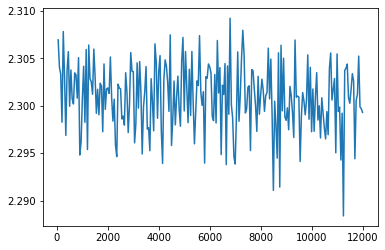

In [21]:
sig_nn = Sigmoid_NeuralNet()

optimizer = tf.optimizers.SGD(0.005)
print("Train Sigmoid Model")
sigmoid_nn = Train_model(sig_nn, optimizer, 40)

In [22]:
sig_acc = accuracy(sig_nn(x_test), y_test)
print("Sigmoid: test accuracy =", sig_acc)

Sigmoid: test accuracy = 0.1135


## Initialization (StandardNormal vs Xavier vs Kaiming (=He=MSRA))

In [27]:
class SN_NeuralNet(Model):
    def __init__(self):
        super(SN_NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, 
                                activation=tf.nn.relu, 
                                kernel_initializer = initializers.RandomNormal(stddev=1))
        self.fc2 = layers.Dense(256, 
                                activation=tf.nn.relu,
                                kernel_initializer = initializers.RandomNormal(stddev=1))
        self.out = layers.Dense(num_classes,
                                kernel_initializer = initializers.RandomNormal(stddev=1))

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x
    
class Xav_NeuralNet(Model):
    def __init__(self):
        super(Xav_NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, 
                                activation=tf.nn.relu, 
                                kernel_initializer = initializers.GlorotNormal())
        self.fc2 = layers.Dense(256, 
                                activation=tf.nn.relu,
                                kernel_initializer = initializers.GlorotNormal())
        self.out = layers.Dense(num_classes,
                                kernel_initializer = initializers.GlorotNormal())

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x
    
class He_NeuralNet(Model):
    def __init__(self):
        super(He_NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128, 
                                activation=tf.nn.relu, 
                                kernel_initializer = initializers.he_normal())
        self.fc2 = layers.Dense(256, 
                                activation=tf.nn.relu,
                                kernel_initializer = initializers.he_normal())
        self.out = layers.Dense(num_classes,
                                kernel_initializer = initializers.he_normal())

    # Set forward pass.
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

In [28]:
sn_nn = SN_NeuralNet()
xav_nn = Xav_NeuralNet()
he_nn = He_NeuralNet()

optimizer = tf.optimizers.SGD(0.01)

epoch:  1 , loss:  2.3210554 acc:  0.1559
epoch:  3 , loss:  2.225888 acc:  0.2008
epoch:  5 , loss:  2.2117307 acc:  0.2492
epoch:  7 , loss:  2.1746612 acc:  0.2765
epoch:  9 , loss:  2.1711428 acc:  0.2995
epoch:  11 , loss:  2.151157 acc:  0.3202
epoch:  13 , loss:  2.1810474 acc:  0.3417
epoch:  15 , loss:  2.1011012 acc:  0.3611
epoch:  17 , loss:  2.0507684 acc:  0.3744
epoch:  19 , loss:  2.0456955 acc:  0.3865
0.3902


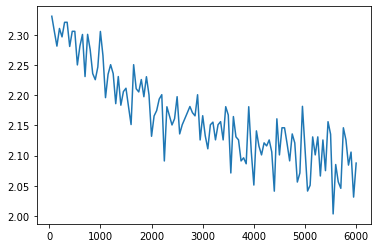

In [29]:
sn_nn = Train_model(sn_nn, optimizer, 20)
sn_acc = accuracy(sn_nn(x_test), y_test)
print(sn_acc)

epoch:  1 , loss:  2.2939324 acc:  0.1944
epoch:  3 , loss:  2.2117023 acc:  0.4167
epoch:  5 , loss:  2.021163 acc:  0.5926
epoch:  7 , loss:  1.8895017 acc:  0.6358
epoch:  9 , loss:  1.83436 acc:  0.711
epoch:  11 , loss:  1.7634314 acc:  0.7356
epoch:  13 , loss:  1.7146742 acc:  0.7439
epoch:  15 , loss:  1.7390809 acc:  0.7478
epoch:  17 , loss:  1.7707704 acc:  0.7506
epoch:  19 , loss:  1.713319 acc:  0.7528
0.8009


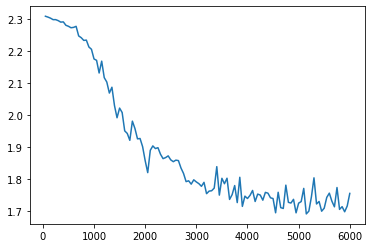

In [30]:
xav_nn = Train_model(xav_nn, optimizer, 20)
xav_acc = accuracy(xav_nn(x_test), y_test)
print(xav_acc)

epoch:  1 , loss:  2.2038007 acc:  0.3511
epoch:  3 , loss:  1.9940768 acc:  0.6335
epoch:  5 , loss:  1.8892728 acc:  0.6539
epoch:  7 , loss:  1.7550114 acc:  0.7327
epoch:  9 , loss:  1.7502878 acc:  0.7479
epoch:  11 , loss:  1.7519994 acc:  0.7525
epoch:  13 , loss:  1.7770417 acc:  0.7556
epoch:  15 , loss:  1.709552 acc:  0.7568
epoch:  17 , loss:  1.7286932 acc:  0.7589
epoch:  19 , loss:  1.6900427 acc:  0.7613
0.7622


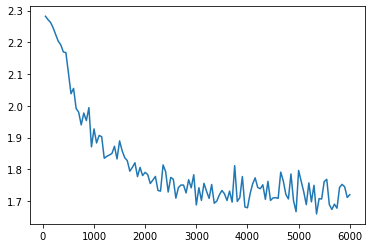

In [31]:
he_nn = Train_model(he_nn, optimizer, 20)
he_acc = accuracy(he_nn(x_test), y_test)
print(he_acc)

In [32]:
print("Standard Normal: test accuracy =", sn_acc)
print("Xavier: test accuracy =", xav_acc)
print("He: test accuracy =", he_acc)

Standard Normal: test accuracy = 0.3902
Xavier: test accuracy = 0.8009
He: test accuracy = 0.7622


## Batch Normalization

In [33]:
def Train_model(model, optimizer, epo, print_loss=True, plot_graph=True):
    step_l = []
    loss_l = []
    
    for epoch in range(1,epo+1):
        for step, (batch_x, batch_y) in enumerate(train_data, 1):
            with tf.GradientTape() as g:
                pred = model(batch_x,is_training=True)
                loss = cross_entropy_loss(pred, batch_y)

            trainable_variables = model.trainable_variables
            gradients = g.gradient(loss, trainable_variables)
            optimizer.apply_gradients(zip(gradients, trainable_variables))
             
            if plot_graph:
                if step % 10 == 0:
                    step_l.append((epoch-1)*300 + step)
                    loss_l.append(loss.numpy())
                    running_loss = 0.0
        if print_loss and epoch % 2 == 0:
                print("epoch: ", epoch, ", loss: ", loss.numpy())
    
    if plot_graph:
        plt.plot(step_l, loss_l)
    return model

In [34]:
# Batch Normalization 코딩
class BN_NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(BN_NeuralNet, self).__init__()
        self.fc1 = layers.Dense(128)
        self.bn1 = layers.BatchNormalization()
        self.ac1 = layers.Activation(tf.nn.relu)
        self.fc2 = layers.Dense(256)
        self.bn2 = layers.BatchNormalization()
        self.ac2 = layers.Activation(tf.nn.relu)
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.bn1(x, training = is_training)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.bn2(x, training = is_training)
        x = self.ac2(x)
        x = self.out(x)
        x = tf.nn.softmax(x)
        return x

epoch:  2 , loss:  1.8046149
epoch:  4 , loss:  1.6607146
epoch:  6 , loss:  1.6040806
epoch:  8 , loss:  1.5698324
epoch:  10 , loss:  1.5478405
epoch:  12 , loss:  1.5577817
epoch:  14 , loss:  1.5569794
epoch:  16 , loss:  1.5664544
epoch:  18 , loss:  1.5501949
epoch:  20 , loss:  1.537509


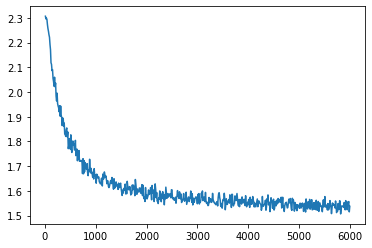

In [35]:
bn_nn = BN_NeuralNet()
optimizer = tf.optimizers.SGD(0.01)

bn_nn = Train_model(bn_nn, optimizer, 20)

In [36]:
bn_acc = accuracy(bn_nn(x_test), y_test)
print("bn_acc = ", bn_acc)

bn_acc =  0.943


## Optimizers (SGD vs SGD+Momentum vs AdaGrad vs RMSprop vs Adam)

In [37]:
mom_nn = BN_NeuralNet()
ada_nn = BN_NeuralNet()
rms_nn = BN_NeuralNet()
adam_nn = BN_NeuralNet()

epoch:  2 , loss:  1.5714772
epoch:  4 , loss:  1.5047739
epoch:  6 , loss:  1.501389
epoch:  8 , loss:  1.5019821
epoch:  10 , loss:  1.5101733
epoch:  12 , loss:  1.4913691
epoch:  14 , loss:  1.4805374
epoch:  16 , loss:  1.4753543
epoch:  18 , loss:  1.4662383
epoch:  20 , loss:  1.4748417
0.9758


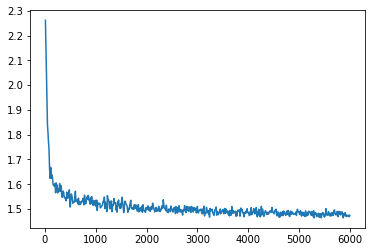

In [38]:
mom_optimizer = tf.optimizers.SGD(0.01, momentum=0.9) # momentum 보통 0.9 많이씀

mom_nn = Train_model(mom_nn, mom_optimizer, 20)
mom_acc = accuracy(mom_nn(x_test), y_test)
print(mom_acc)

epoch:  2 , loss:  1.6134022
epoch:  4 , loss:  1.5589554
epoch:  6 , loss:  1.5273291
epoch:  8 , loss:  1.5415051
epoch:  10 , loss:  1.5330359
epoch:  12 , loss:  1.529354
epoch:  14 , loss:  1.5029175
epoch:  16 , loss:  1.5050292
epoch:  18 , loss:  1.504746
epoch:  20 , loss:  1.498693
0.9607


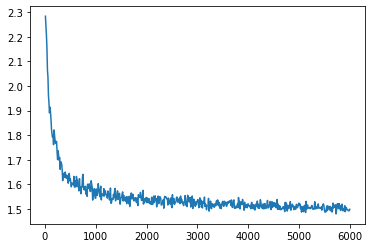

In [39]:
ada_optimizer = tf.optimizers.Adagrad(0.01)

ada_nn = Train_model(ada_nn, ada_optimizer, 20)
ada_acc = accuracy(ada_nn(x_test), y_test)
print(ada_acc)

epoch:  2 , loss:  1.5316243
epoch:  4 , loss:  1.4832975
epoch:  6 , loss:  1.5073587
epoch:  8 , loss:  1.4907694
epoch:  10 , loss:  1.475349
epoch:  12 , loss:  1.4846486
epoch:  14 , loss:  1.4762441
epoch:  16 , loss:  1.4810247
epoch:  18 , loss:  1.4757624
epoch:  20 , loss:  1.4809467
0.9777


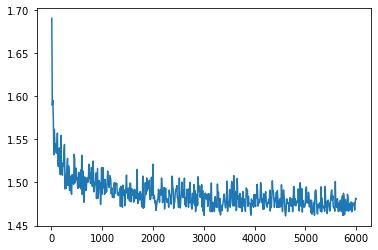

In [40]:
rms_optimizer = tf.optimizers.RMSprop(0.01)

rms_nn = Train_model(rms_nn, rms_optimizer, 20)
rms_acc = accuracy(rms_nn(x_test), y_test)
print(rms_acc)

epoch:  2 , loss:  1.5033473
epoch:  4 , loss:  1.5041143
epoch:  6 , loss:  1.4920486
epoch:  8 , loss:  1.4896513
epoch:  10 , loss:  1.4895682
epoch:  12 , loss:  1.4765171
epoch:  14 , loss:  1.502672
epoch:  16 , loss:  1.4740852
epoch:  18 , loss:  1.485215
epoch:  20 , loss:  1.477025
0.9728


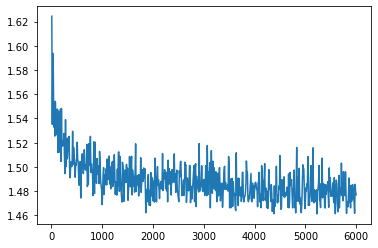

In [41]:
adam_optimizer = tf.optimizers.Adam(0.01)

adam_nn = Train_model(adam_nn, adam_optimizer, 20)
adam_acc = accuracy(adam_nn(x_test), y_test)
print(adam_acc)

In [42]:
print("SGD: test accuracy =", bn_acc)
print("SGD+Momentum: test accuracy =", mom_acc)
print("AdaGrad: test accuracy =", ada_acc)
print("RMSProp: test accuracy =", rms_acc)
print("Adam: test accuracy =", adam_acc)

SGD: test accuracy = 0.943
SGD+Momentum: test accuracy = 0.9758
AdaGrad: test accuracy = 0.9607
RMSProp: test accuracy = 0.9777
Adam: test accuracy = 0.9728


## Learning Rate Decay

In [43]:
exp_nn = BN_NeuralNet()
stair_nn = BN_NeuralNet()

epoch:  2 , loss:  1.5005546
epoch:  4 , loss:  1.4993442
epoch:  6 , loss:  1.4869161
epoch:  8 , loss:  1.4800147
epoch:  10 , loss:  1.4730215
epoch:  12 , loss:  1.4675972
epoch:  14 , loss:  1.4850541
epoch:  16 , loss:  1.4679503
epoch:  18 , loss:  1.4630017
epoch:  20 , loss:  1.4836426
0.9789


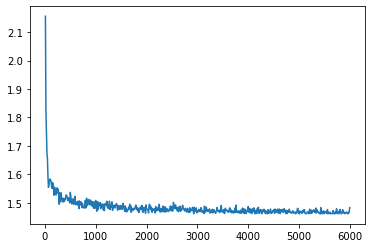

In [44]:
# def decayed_learning_rate(step):
#   return initial_learning_rate * decay_rate ^ (step / decay_steps)
exp_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.04,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=False)

exp_optimizer = tf.optimizers.SGD(learning_rate = exp_lr_schedule, momentum=0.9)
exp_nn = Train_model(exp_nn, exp_optimizer, 20)
exp_acc = accuracy(exp_nn(x_test), y_test)
print(exp_acc)

epoch:  2 , loss:  1.4920878
epoch:  4 , loss:  1.4879928
epoch:  6 , loss:  1.4705468
epoch:  8 , loss:  1.467426
epoch:  10 , loss:  1.4740741
epoch:  12 , loss:  1.475148
epoch:  14 , loss:  1.4743799
epoch:  16 , loss:  1.4788544
epoch:  18 , loss:  1.4750901
epoch:  20 , loss:  1.4750079
0.9774


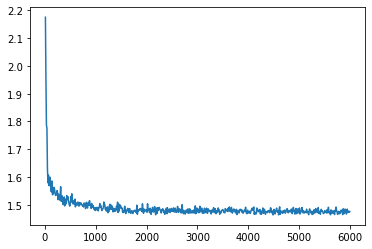

In [45]:
stair_lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [1500, 12000],
    values = [0.04, 0.005, 0.0001])

stair_optimizer = tf.optimizers.SGD(learning_rate = stair_lr_schedule, momentum=0.9)
stair_nn = Train_model(stair_nn, stair_optimizer, 20)
stair_acc = accuracy(stair_nn(x_test), y_test)
print(stair_acc)